<a href="https://colab.research.google.com/github/kasnk/Deep_Learning/blob/main/DL_Pract3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.isnull().sum())

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

df.fillna(df.mean(), inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_scaled = scaler.fit_transform(X)

display(pd.DataFrame(X_scaled, columns=X.columns).head())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [5]:
# Add a column of ones for the intercept term
X_scaled = np.insert(X_scaled, 0, 1, axis=1)

# Initialize parameters (weights and bias)
# Number of features + 1 for the intercept
theta = np.zeros(X_scaled.shape[1])

# Set the learning rate
alpha = 0.01

# Number of iterations
iterations = 100

# Store cost values for plotting (optional)
cost_history = []

# Gradient Descent
for i in range(iterations):
    # Compute predictions
    predictions = X_scaled.dot(theta)

    # Compute the cost function (Mean Squared Error)
    cost = (1/X_scaled.shape[0]) * np.sum((predictions - y)**2)
    cost_history.append(cost)

    # Compute the gradient
    gradient = (1/X_scaled.shape[0]) * X_scaled.T.dot(predictions - y)

    # Update parameters
    theta -= alpha * gradient

    # Show cost value every 100 iteration
    if (i + 1) % 100 == 0:
        print(f"Iteration {i+1}, Cost: {cost}")

print("Gradient Descent Finished.")
print("Final parameters (theta):", theta)

Iteration 100, Cost: 0.17724467897127827
Gradient Descent Finished.
Final parameters (theta): [0.2212283  0.04568855 0.12028852 0.01578897 0.02858069 0.02916849
 0.06480898 0.03777504 0.03800222]


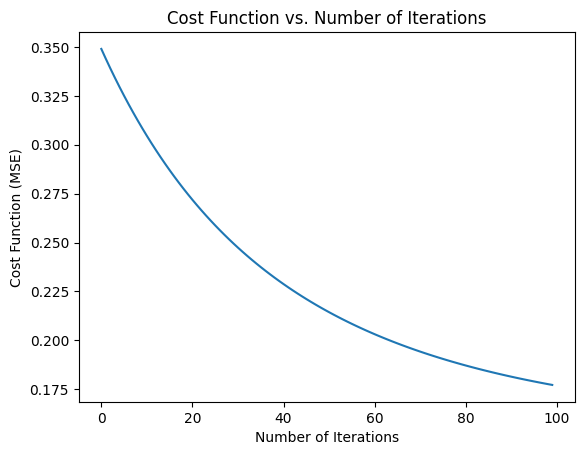

In [6]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function (MSE)')
plt.title('Cost Function vs. Number of Iterations')
plt.show()